In [6]:
import pandas as pd 
import os 
from modules.plotting import plot_bar, plot_pie_chart
import numpy as np  
import matplotlib.pyplot as plt
import re

fp = os.path.join('data', 'results','DEEP_Cleaned_Survey_Responses_S1.csv')
df = pd.read_csv(fp, index_col=0)
display(df.head(), df.shape)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Transportation,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,0,NaN,0,1,0,0,1,0,0,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,0,NaN,1,0,1,0,0,1,0,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,0,NaN,0,0,1,0,0,0,0,NaN
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,en,1286.0,Michael,NaN,In person,...,1,NaN,0,0,0,0,0,1,0,NaN
5,1.185215e+11,452261040.0,01/25/2024 11:51:15 AM,01/25/2024 12:13:25 PM,167.21.141.30,en,1330.0,"Other (please specify event name, if applicable)",Brad Haley,Online,...,0,NaN,1,1,1,1,1,1,0,NaN


(290, 89)

<!-- Break down education groups to 3 (4)? -->


---

In [7]:
df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'language', 'total_time',
       'How did you learn about the survey?_Response',
       'How did you learn about the survey?_Other',
       'Are you taking this survey online or in person?_Response',
       'What zip code do you currently live in?_Open',
       'What is your date of birth?_Date',
       'Which of the following best describes you?_Response',
       'What is the highest level of education that you have attained?_Response',
       'Do you hold any professional certifications?_Response',
       'What certifications do you hold?_Open',
       'Are you currently employed?_Response',
       'How many jobs do you currently work at?_Response',
       'What are your current job title(s)_Open',
       'Does your current compensation cover what you need to feel financially comfortable?_Response',
       'What would it take for you to feel like you were earning enough to feel financially comforta

### Sets of Questions in this notebook

* Degree Status Does not Appear to Predict What Skills People Prefer 

    * Communication & Soft Skills vs Other Skills (P Value: .049) 
    
        * **Kamran**: Just compare the percentages by degree status who most cite communication skills. Chi Square or T-test makes less sense without ranking
    
    * Chi Square Test on all skills together (P Value:  0.63)

* Degree Status Does Appear to Predict Barriers Cited

* Who in the survey is found in one of the two focused industries (Food & Hospitality + Entrepreneurship)?

    *    *Not enough data on agriculture, which Tina also mentioned*
    
* Have respondents in these two groups taken workforce training programs? Where? Do they have feedback? <!--  What skills did they obtain there -->
* Do barriers vary geographically inside wilmington/new castle and outside? 

    * **Kamran**: Connect to existing Zip codes mapping 

In [8]:
other_dir = os.path.join('data', 'manual_categories', 'other')
open_dir = os.path.join('data', 'manual_categories', 'open')

### Educational Attainment  

In [9]:
edu_level_q ='What is the highest level of education that you have attained?_Response'
df_college = df[['Respondent ID', edu_level_q]]
df_college_non_nan = df_college[~df_college[edu_level_q].isna()]

degree_types = ["Bachelor's degree", "Associate's degree","Master's or higher degree"]
df_college_non_nan['higher_ed'] = np.where(df_college_non_nan[edu_level_q].isin(degree_types), 'Degree', 'No Degree')
df_college_non_nan

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_45678/3217491399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_college_non_nan['higher_ed'] = np.where(df_college_non_nan[edu_level_q].isin(degree_types), 'Degree', 'No Degree')


,Respondent ID,What is the highest level of education that you have attained?_Response,higher_ed
1,1.185240e+11,Bachelor's degree,Degree
2,1.185239e+11,Associate's degree,Degree
3,1.185239e+11,"Some college, no degree",No Degree
4,1.185234e+11,High school diploma,No Degree
5,1.185215e+11,GED,No Degree
...,...,...,...
286,1.184166e+11,Currently attending high school,No Degree
287,1.184166e+11,Currently attending high school,No Degree
288,1.184166e+11,Currently attending high school,No Degree
289,1.184164e+11,Master's or higher degree,Degree


What is the highest level of education that you have attained? (N=288)


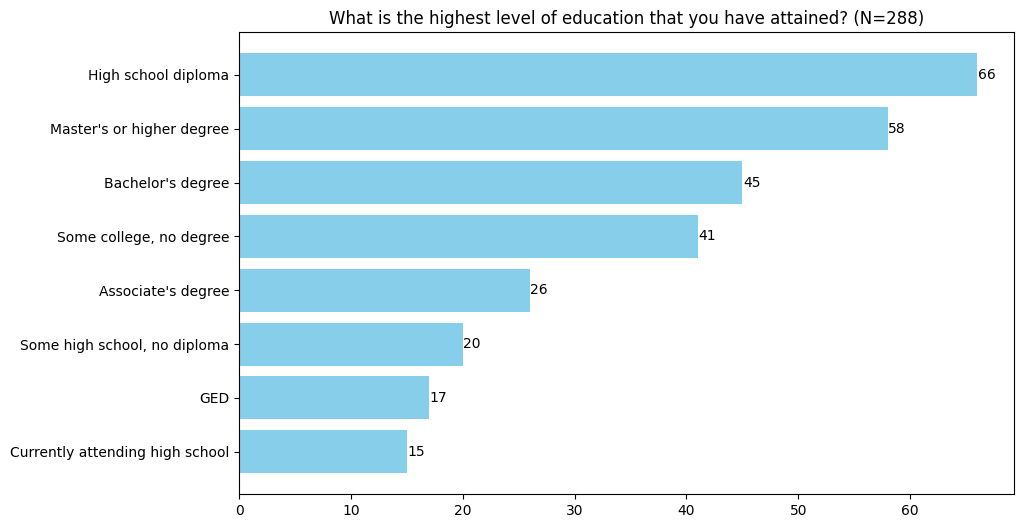

Count Column: 288


,What Is The Highest Level Of Education That You Have Attained? Response,Count
1,High school diploma,66
2,Master's or higher degree,58
3,Bachelor's degree,45
4,"Some college, no degree",41
5,Associate's degree,26
6,"Some high school, no diploma",20
7,GED,17
8,Currently attending high school,15


In [10]:
## By specific Education Level 
# Bar Chart 
df_respondent_by_edu_level_counts = df_college_non_nan[edu_level_q].value_counts()

title = edu_level_q.rstrip('_Response') +f" (N={df_college_non_nan.shape[0]})"
print(title)

plot_bar(df_respondent_by_edu_level_counts, title=title)

In [11]:
df_respondent_by_edu_level_counts = df_respondent_by_edu_level_counts.reset_index()
total = df_respondent_by_edu_level_counts['count'].sum()
print(total)
df_respondent_by_edu_level_counts['pct'] = df_respondent_by_edu_level_counts['count'].apply(lambda x: np.round(x / total, 2))
df_respondent_by_edu_level_counts

288


,What is the highest level of education that you have attained?_Response,count,pct
0,High school diploma,66,0.23
1,Master's or higher degree,58,0.20
2,Bachelor's degree,45,0.16
3,"Some college, no degree",41,0.14
4,Associate's degree,26,0.09
5,"Some high school, no diploma",20,0.07
6,GED,17,0.06
7,Currently attending high school,15,0.05


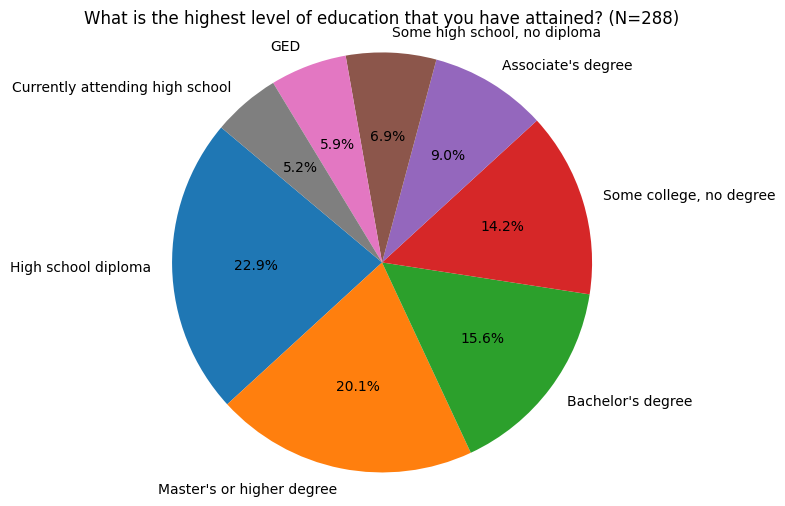

(None,)

In [12]:
edu_level_q = 'What is the highest level of education that you have attained?_Response'
title = edu_level_q.rstrip('_Response') +f" (N={df_college_non_nan.shape[0]})"

v_counts = df_respondent_by_edu_level_counts.rename({edu_level_q:'Education Level', 
                                          'count':'Count'}, axis=1)
plot_pie_chart(v_counts, label_column='Education Level', count_column='Count', title=title), 

##### Education & Desired Skills

In [13]:
## Desired skills 
desired_skills_fp = os.path.join('data', 'manual_categories', 'open', "What skills would you most like to develop?_n=210.csv")

df_desired_skills = pd.read_csv(desired_skills_fp, index_col=0).set_index(['Respondent ID'])
df_edu_joined = df_college_non_nan.merge(df_desired_skills, how='left', left_on='Respondent ID', right_index=True)

In [14]:
df_edu_joined

,Respondent ID,What is the highest level of education that you have attained?_Response,higher_ed,What skills would you most like to develop?_Open,category
1,1.185240e+11,Bachelor's degree,Degree,"Prioritizing, organization",Business & Management
2,1.185239e+11,Associate's degree,Degree,I could teach some things I have learned,No Skills
3,1.185239e+11,"Some college, no degree",No Degree,Believe I have enough,No Skills
4,1.185234e+11,High school diploma,No Degree,Just more of the business structure of things ...,Business & Management
5,1.185215e+11,GED,No Degree,Computer Skills,It & Technical
...,...,...,...,...,...
286,1.184166e+11,Currently attending high school,No Degree,Better social skills,Communication & Soft Skills
287,1.184166e+11,Currently attending high school,No Degree,Currently knowledge since I’m still in high sc...,Construction & Vocational
288,1.184166e+11,Currently attending high school,No Degree,NaN,NaN
289,1.184164e+11,Master's or higher degree,Degree,Making sure I can effectively incorporate my S...,Business & Management


In [15]:
## Percentage breakdown of those who said they listed soft-skills as their most-desired skill 
df_want_soft_skills = df_edu_joined[df_edu_joined['category'] == 'Communication & Soft Skills']
n_want_soft_skills = df_want_soft_skills.shape[0]

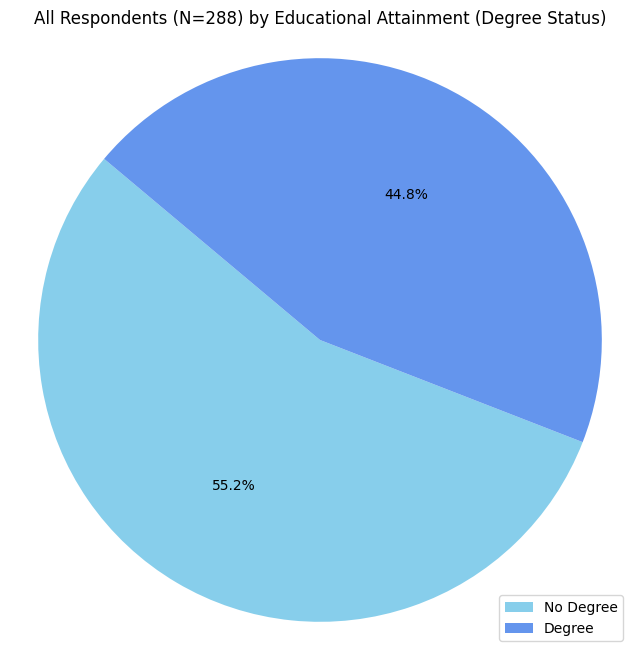

,Degree Status,Count
0,No Degree,159
1,Degree,129


In [16]:
title = f'All Respondents (N={df_edu_joined.shape[0]}) by Educational Attainment (Degree Status)'

data = df_edu_joined['higher_ed'].value_counts().reset_index()
data['pct'] = data['count'].apply(lambda x: (x / n_want_soft_skills))

plt.figure(figsize=(8, 8))
plt.pie(x=data['pct'].values, labels=None, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'cornflowerblue'])
plt.legend(data['higher_ed'], loc="lower right")
plt.axis('equal')
plt.title(title)
plt.show()

data_to_display = data.rename({"higher_ed":"Degree Status", 'count':'Count'}, axis=1)
data_to_display[['Degree Status', 'Count']]


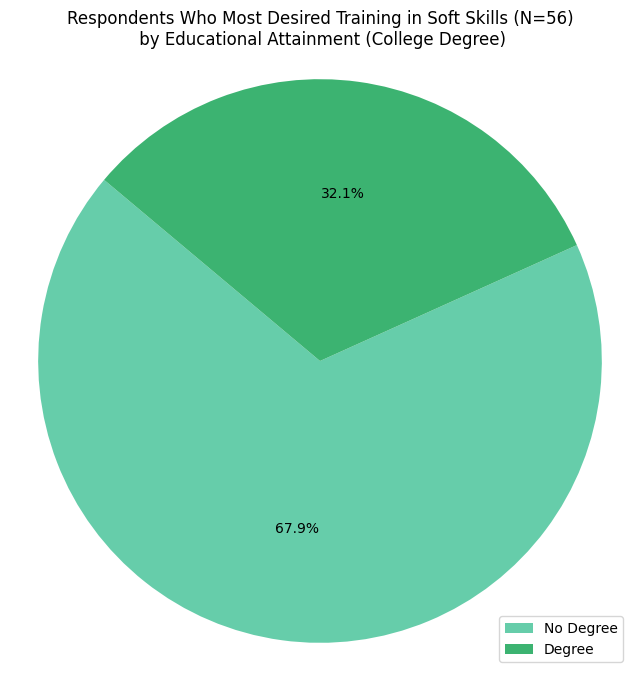

,Degree Status,Count
0,No Degree,38
1,Degree,18


In [17]:
title = f'Respondents Who Most Desired Training in Soft Skills (N={n_want_soft_skills})\n by Educational Attainment (College Degree)'

data = df_want_soft_skills['higher_ed'].value_counts().reset_index()
data['pct'] = data['count'].apply(lambda x: (x / n_want_soft_skills))

plt.figure(figsize=(8, 8))
plt.pie(x=data['pct'].values, labels=None, autopct='%1.1f%%', startangle=140, colors=['mediumaquamarine', 'mediumseagreen'])
plt.legend(data['higher_ed'], loc="lower right")
plt.axis('equal')
plt.title(title)
plt.show()

data_to_display = data.rename({"higher_ed":"Degree Status", 'count':'Count'}, axis=1)
data_to_display[['Degree Status', 'Count']]

In [18]:
from scipy.stats import chi2_contingency

title = 'Chi Square Test (Preference for Communication & Soft Skills vs Other Skills, By Degree Status)'
print(title)

data = df_edu_joined.copy()

display(data.head(), data.shape)

ss = 'Communication & Soft Skills'
data['Skill Preference'] = np.where(data['category'] != ss, 'Other Skill', ss)
contingency_table = pd.crosstab(data['higher_ed'], data['Skill Preference'])

display(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

 
print("Chi-square statistic:", chi2)
print("P-value:", p) 
# 0.04871529573006351 is *technically* below .05 but I would not be confident here 
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi Square Test (Preference for Communication & Soft Skills vs Other Skills, By Degree Status)


,Respondent ID,What is the highest level of education that you have attained?_Response,higher_ed,What skills would you most like to develop?_Open,category
1,1.185240e+11,Bachelor's degree,Degree,"Prioritizing, organization",Business & Management
2,1.185239e+11,Associate's degree,Degree,I could teach some things I have learned,No Skills
3,1.185239e+11,"Some college, no degree",No Degree,Believe I have enough,No Skills
4,1.185234e+11,High school diploma,No Degree,Just more of the business structure of things ...,Business & Management
5,1.185215e+11,GED,No Degree,Computer Skills,It & Technical


(288, 5)

Skill Preference,Communication & Soft Skills,Other Skill
higher_ed,,
Degree,18,111
No Degree,38,121


Chi-square statistic: 3.8851367270667923
P-value: 0.04871529573006351
Degrees of freedom: 1
Expected frequencies table:
[[ 25.08333333 103.91666667]
 [ 30.91666667 128.08333333]]


In [19]:
title = 'Chi Square Test (All Skills Together)'

contingency_table = pd.crosstab(data['higher_ed'], data['category'])

display(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p) 
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

category,Business & Management,Communication & Soft Skills,Construction & Vocational,Education,Food & Hospitality,It & Technical,Language,Leadership,Medical & Counseling,Misc.,No Skills,Paralegal,Self-Skills
higher_ed,,,,,,,,,,,,,
Degree,16,18,3,3,2,11,0,3,3,4,7,1,3
No Degree,25,38,9,2,2,14,1,2,8,10,12,0,13


Chi-square statistic: 9.84148893980149
P-value: 0.629864479682607
Degrees of freedom: 12
Expected frequencies table:
[[14.44761905 19.73333333  4.22857143  1.76190476  1.40952381  8.80952381
   0.35238095  1.76190476  3.87619048  4.93333333  6.6952381   0.35238095
   5.63809524]
 [26.55238095 36.26666667  7.77142857  3.23809524  2.59047619 16.19047619
   0.64761905  3.23809524  7.12380952  9.06666667 12.3047619   0.64761905
  10.36190476]]


**Does not appear to predict**

In [20]:
# Percentages and counts for all skill categories by each education level
desired_skills_q = 'What skills would you most like to develop?_Open'
v_counts = df_edu_joined.groupby('higher_ed')['category'].value_counts().reset_index(['category'])
df_desired_skills_edu_level = pd.pivot(v_counts, columns=['category'], values=['count']).fillna(0)
df_desired_skills_edu_level.columns = [col[1] for col in df_desired_skills_edu_level.columns]
df_desired_skills_edu_level['n_deg_level'] = df_desired_skills_edu_level.sum(axis=1)
for col in df_desired_skills_edu_level.columns[:-1]: 
    df_desired_skills_edu_level[f'{col}_pct'] = (df_desired_skills_edu_level[col] / df_desired_skills_edu_level['n_deg_level'])

df_desired_skills_edu_level_pct = df_desired_skills_edu_level.filter(regex='pct|n_deg') # .iloc[:,1:].sum(axis=1)

df_desired_skills_edu_level_pct

,n_deg_level,Business & Management_pct,Communication & Soft Skills_pct,Construction & Vocational_pct,Education_pct,Food & Hospitality_pct,It & Technical_pct,Language_pct,Leadership_pct,Medical & Counseling_pct,Misc._pct,No Skills_pct,Paralegal_pct,Self-Skills_pct
higher_ed,,,,,,,,,,,,,,
Degree,74.0,0.216216,0.243243,0.040541,0.040541,0.027027,0.148649,0.000000,0.040541,0.040541,0.054054,0.094595,0.013514,0.040541
No Degree,136.0,0.183824,0.279412,0.066176,0.014706,0.014706,0.102941,0.007353,0.014706,0.058824,0.073529,0.088235,0.000000,0.095588


Condense some of the skills for plotting


,Business & Management,Communication & Soft Skills,Construction & Vocational,Education,It & Technical,Leadership,Medical & Counseling,No Skills,n_deg_level,Other Skills
higher_ed,,,,,,,,,,
Degree,16.0,18.0,3.0,3.0,11.0,3.0,3.0,7.0,74.0,10.0
No Degree,25.0,38.0,9.0,2.0,14.0,2.0,8.0,12.0,136.0,26.0


Recalculate the percentages


,n_deg_level,Business & Management_pct,Communication & Soft Skills_pct,Construction & Vocational_pct,Education_pct,It & Technical_pct,Leadership_pct,Medical & Counseling_pct,No Skills_pct,Other Skills_pct
higher_ed,,,,,,,,,,
Degree,74.0,0.216216,0.243243,0.040541,0.040541,0.148649,0.040541,0.040541,0.094595,0.135135
No Degree,136.0,0.183824,0.279412,0.066176,0.014706,0.102941,0.014706,0.058824,0.088235,0.191176


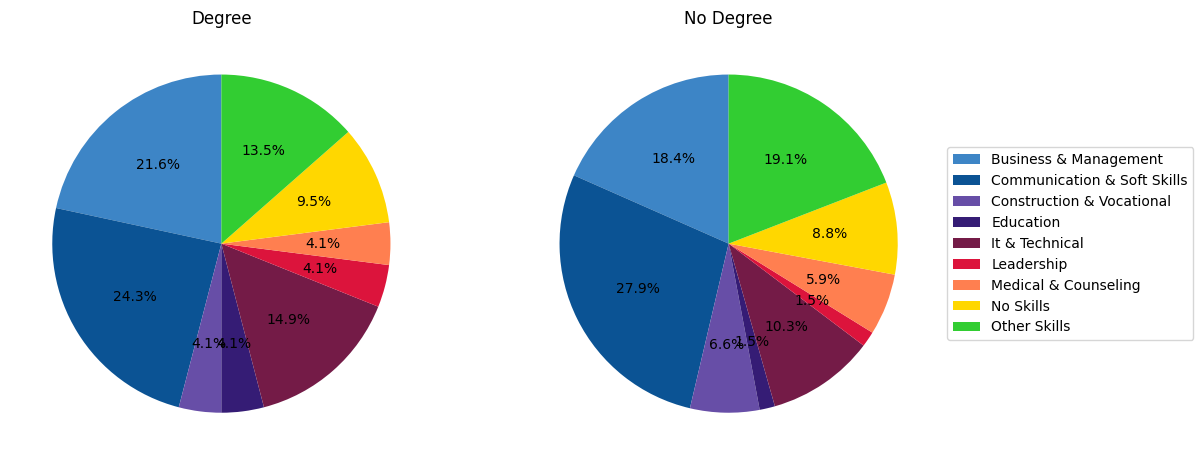

In [21]:
## In-Line Pie Charts (Desired Skills)

title='Most Desired Skills By Degree Status'

# Condense some of the skills for plotting
df_desired_skills_edu_level_counts = df_desired_skills_edu_level[[col for col in df_desired_skills_edu_level.columns if 'pct' not in col]]
df_desired_skills_edu_level_counts
skills_to_condense = ['Self-Skills', 'Misc.','Language', 'Food & Hospitality', 'Paralegal']

df_desired_skills_edu_level_counts_condensed = df_desired_skills_edu_level_counts.copy()
df_desired_skills_edu_level_counts_condensed['Other Skills'] = df_desired_skills_edu_level_counts_condensed[skills_to_condense].sum(axis=1)
df_desired_skills_edu_level_counts_condensed.drop(skills_to_condense, axis=1, inplace=True)

print('Condense some of the skills for plotting')
display(df_desired_skills_edu_level_counts_condensed)

# Recalculate the percentages 
print('Recalculate the percentages')
data = df_desired_skills_edu_level_counts_condensed.copy()
for col in data.columns: 
    if col != 'n_deg_level':
        data[f'{col}_pct'] = (data[col] / data['n_deg_level'])
data = data.filter(regex='n_deg_level|pct')
display(data)

# Plot 
data = df_desired_skills_edu_level_counts_condensed.drop(['n_deg_level'], axis=1)
# labels = [col.rstrip('_pct').title() for col in data.columns]
labels = None

color_map = {'Business & Management': '#3d85c6',
 'Communication & Soft Skills': '#0b5394',
 'Construction & Vocational': '#674ea7',
 'Education': '#351c75',
 'It & Technical': '#741b47',
 'Leadership': '#dc143c',
 'Medical & Counseling': '#ff7f50',
 'No Skills': '#ffd700',
 'Other Skills': '#32cd32'}

fig, axs = plt.subplots(1, len(data.index), figsize=(12, 6))

for i, group in enumerate(data.index):
    wedges, texts, autotexts = axs[i].pie([data[col][i] for col in data.columns], 
               labels=labels, 
               colors=[color_map[col] for col in data.columns],
               autopct='%1.1f%%', 
               startangle=90)
    axs[i].set_title(group)

plt.legend(wedges, list(data.columns), loc='center left', bbox_to_anchor=(1, 0.5))  # Create custom legend


##### Education & Barriers

In [27]:
fp = 'data/manual_categories/other/What are some barriers that you feel you face to achieving your ideal job?_n=107.csv'
df_barrier_cats = pd.read_csv(fp, index_col=0).set_index('Respondent ID')['category']

barrier_q = 'What are some barriers that you feel you face to achieving your ideal job?'
barrier_cols = list(df.filter(regex='barrier').columns)
barrier_types = [col.split('_')[-1] if barrier_q in col else col for col in barrier_cols]

df_barrier = df[['Respondent ID'] + barrier_cols].merge(df_barrier_cats, how='left', left_on='Respondent ID', right_index=True)

df_barrier[barrier_cols[:-1]].sum(axis=0).reset_index()[0].sum()

202

In [23]:
df_barrier_joined = pd.read_csv('df_barrier_joined.csv', index_col=0)
barrier_cols = list(df.filter(regex='barrier').columns)
df_barrier_joined

,Respondent ID,What are some barriers that you feel you face to achieving your ideal job?_Lack of childcare,What are some barriers that you feel you face to achieving your ideal job?_Transportation challenges,What are some barriers that you feel you face to achieving your ideal job?_Criminal history,What are some barriers that you feel you face to achieving your ideal job?_Lack of trainings/skills set,What are some barriers that you feel you face to achieving your ideal job?_Social emotional skills,What are some barriers that you feel you face to achieving your ideal job?_Other,category
0,1.185240e+11,0,0,0,0,0,no barriers,No Barriers
1,1.185239e+11,0,0,0,0,0,Political Barriers,Social Barriers
2,1.185239e+11,0,0,0,0,0,Non at all,No Barriers
3,1.185234e+11,0,0,0,1,0,NaN,NaN
4,1.185215e+11,0,0,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...
284,1.184166e+11,0,0,0,0,0,Mom,Misc.
285,1.184166e+11,0,1,0,0,0,NaN,NaN
286,1.184166e+11,0,1,0,0,1,NaN,NaN
287,1.184166e+11,0,0,0,1,0,NaN,NaN


In [28]:
df_edu_barrier_joined = df_college_non_nan \
             .merge(df_barrier_joined.rename({'category':'barrier_category'}, axis=1), 
                    how='left', 
                    on='Respondent ID')

## Fill NaNs 
# nan_fill = {col:0 for col in barrier_cols[:-1]}
# nan_fill['barrier_category'] = 'No Response'
# df_edu_barrier_joined = df_edu_barrier_joined.fillna(nan_fill, axis=0)

## Rename columns 
df_edu_barrier_joined.columns = [col.split('_')[-1] if barrier_q in col else col for col in df_edu_barrier_joined.columns]

display(df_edu_barrier_joined.head(), df_edu_barrier_joined.shape)

,Respondent ID,What is the highest level of education that you have attained?_Response,higher_ed,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,Other,barrier_category
0,1.185240e+11,Bachelor's degree,Degree,0.0,0.0,0.0,0.0,0.0,no barriers,No Barriers
1,1.185239e+11,Associate's degree,Degree,0.0,0.0,0.0,0.0,0.0,Political Barriers,Social Barriers
2,1.185239e+11,"Some college, no degree",No Degree,0.0,0.0,0.0,0.0,0.0,Non at all,No Barriers
3,1.185234e+11,High school diploma,No Degree,0.0,0.0,0.0,1.0,0.0,NaN,NaN
4,1.185215e+11,GED,No Degree,0.0,0.0,0.0,1.0,0.0,NaN,NaN


(288, 10)

In [29]:
## Pivot the "Other" Barrier cats 
deg_status_barrier_cats = df_edu_barrier_joined.groupby('higher_ed')['barrier_category'].value_counts().reset_index()
deg_status_barrier_cats = pd.pivot(deg_status_barrier_cats,index='higher_ed', values='count', columns='barrier_category').fillna(0)
deg_status_barrier_cats.columns.name = None 
# deg_status_barrier_cats.columns = [col + "_Other" for col in deg_status_barrier_cats.columns]
# display(deg_status_barrier_cats)

## Join with Rest of barriers 
deg_status_all_barriers_wide = df_edu_barrier_joined.groupby('higher_ed')[barrier_types[:-1]].sum()\
    .join(deg_status_barrier_cats, how='left')
deg_status_all_barriers_wide['Lack of trainings/skills set'] = deg_status_all_barriers_wide['Lack of trainings/skills set'] + deg_status_all_barriers_wide['Lack Of Trainings/Skills Set']	
deg_status_all_barriers_wide.drop(['Lack Of Trainings/Skills Set'], axis=1, inplace=True)
# wide format 
# display(deg_status_all_barriers_wide)
# long (w/ percent citing)
deg_status_all_barriers = deg_status_all_barriers_wide.T
deg_status_all_barriers.columns.name = None
deg_status_v_counts = df_college_non_nan['higher_ed'].value_counts()
for status in ('Degree', 'No Degree'): 
    deg_status_all_barriers[f'{status}_Pct-Citing-Barrier'] = (deg_status_all_barriers[status] / deg_status_v_counts[status]).round(2)
    # deg_status_all_barriers[f'{status}_Pct-Not-Citing'] = 1 - deg_status_all_barriers[f'{status}_Pct-Citing-Barrier']

deg_status_all_barriers = deg_status_all_barriers.sort_values(['No Degree_Pct-Citing-Barrier', 'Degree_Pct-Citing-Barrier'],ascending=False)

print('Percent Citing Barrier Type by Degree Status')
display(deg_status_all_barriers[[col for col in deg_status_all_barriers.columns if 'Not' not in col]])

Percent Citing Barrier Type by Degree Status


,Degree,No Degree,Degree_Pct-Citing-Barrier,No Degree_Pct-Citing-Barrier
Lack of trainings/skills set,19.0,71.0,0.15,0.45
Transportation challenges,6.0,38.0,0.05,0.24
Social emotional skills,6.0,22.0,0.05,0.14
Criminal history,0.0,23.0,0.00,0.14
Lack of childcare,3.0,16.0,0.02,0.10
Lack Of Resources,5.0,7.0,0.04,0.04
Lack Of Opportunities,9.0,4.0,0.07,0.03
No Barriers,8.0,5.0,0.06,0.03
Lack Of Education,6.0,5.0,0.05,0.03
Misc.,2.0,4.0,0.02,0.03


,Degree,No Degree,Degree_Pct-Citing-Barrier,No Degree_Pct-Citing-Barrier
Lack of trainings/skills set,19.0,71.0,0.15,0.45
Transportation challenges,6.0,38.0,0.05,0.24
Social emotional skills,6.0,22.0,0.05,0.14
Criminal history,0.0,23.0,0.00,0.14
Lack of childcare,3.0,16.0,0.02,0.10


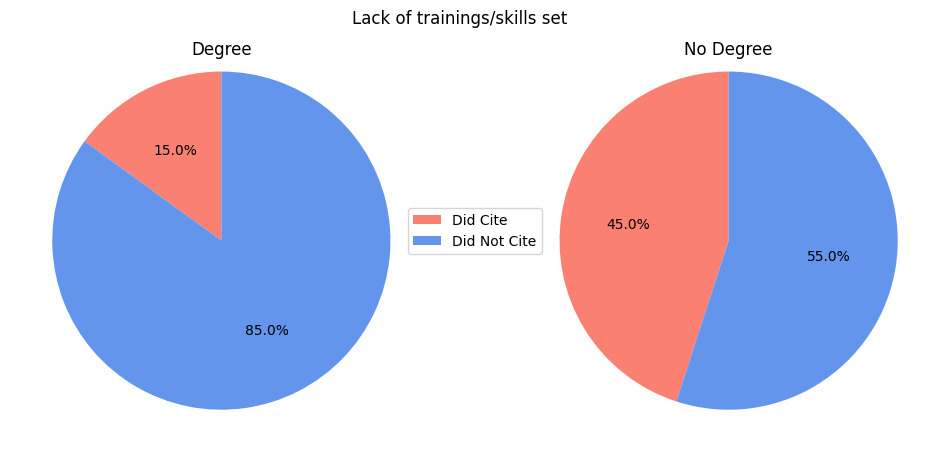

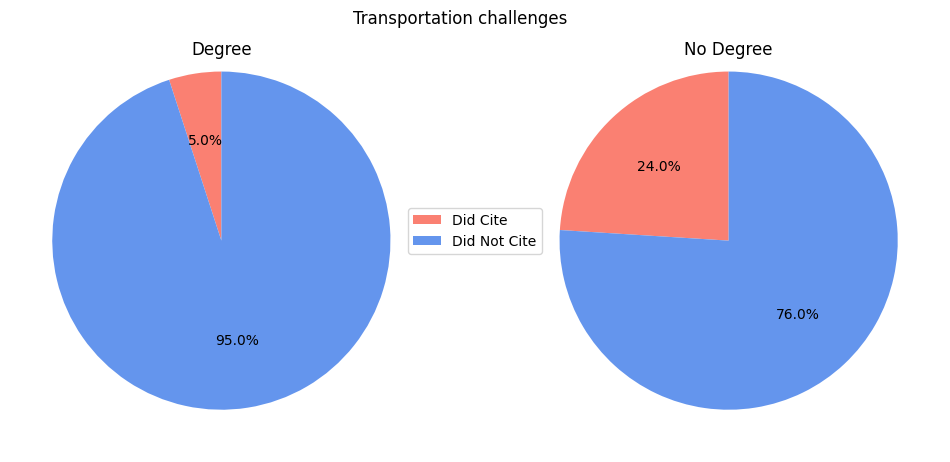

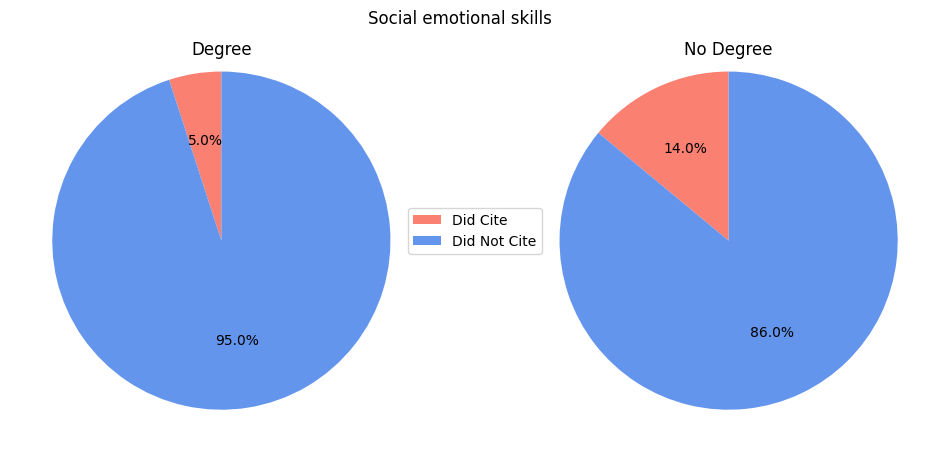

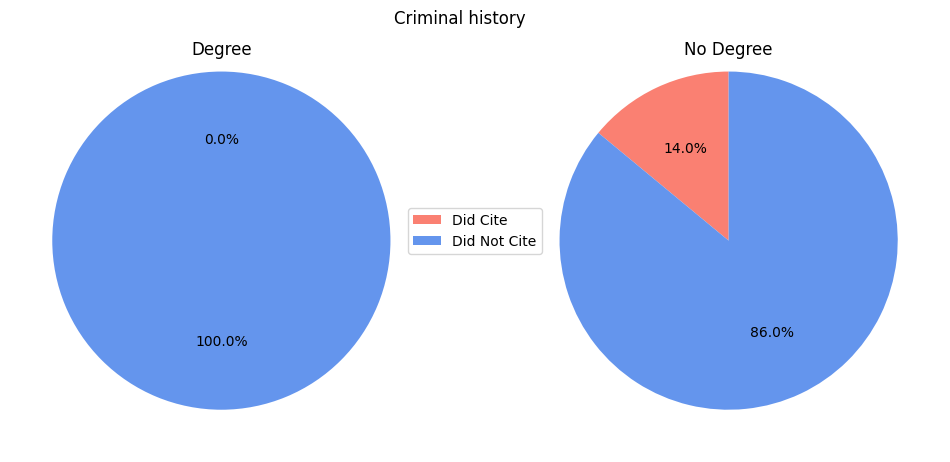

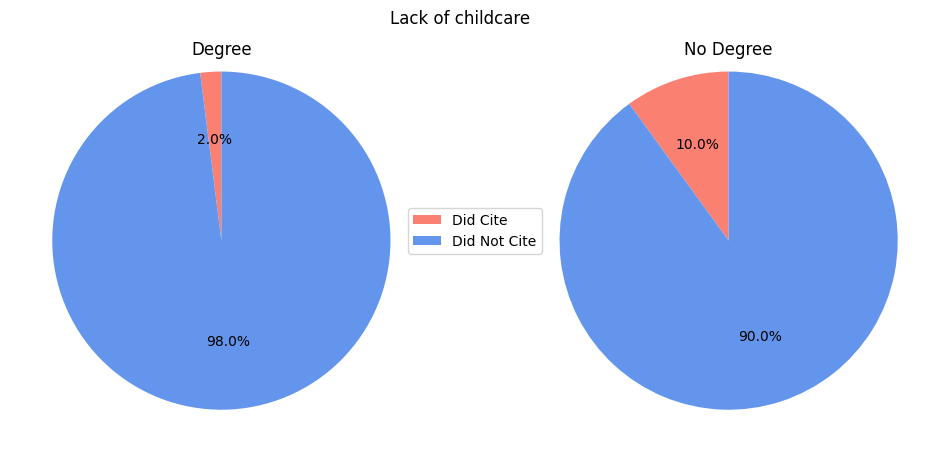

In [30]:
## Five in-line pie charts for the top five barriers,
# Comparing the percentage of degree holders and non-degree holders who cited the barrier 
data = deg_status_all_barriers.iloc[:5,:]
display(data)

edu_status = ('Degree', 'No Degree')
for idx_barrier, row_data in data.iterrows():
    fig, axs = plt.subplots(1, len(edu_status), figsize=(12, 6))
    # left is degree, right is no degree 
    for i, status in enumerate(edu_status):

        pct_yes = row_data[f"{status}_Pct-Citing-Barrier"]
        pct_no = 1 - pct_yes
        wedges, texts, autotexts = axs[i].pie([pct_yes, pct_no], 
                labels=None, 
                colors=['salmon', 'cornflowerblue'],
                autopct='%1.1f%%', 
                startangle=90)
        
        axs[i].set_title(status, y=.92)

    fig.legend(labels=['Did Cite','Did Not Cite'], loc='center')
    fig.suptitle(t=idx_barrier, y=.88)



---

In [437]:
title = 'Chi Square Test (Degree Status & All Barriers)'

contingency_table = deg_status_all_barriers_wide.copy()

display(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p) 
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,Age,Current Employment Situation,Lack Of Education,Lack Of Experience,Lack Of Opportunities,Lack Of Resources,Lack Of Time,Language/Migrant Status,Location,Misc.,No Barriers,Personal Barriers,Social Barriers,Social Emotional Skills,Unsure
higher_ed,,,,,,,,,,,,,,,,,,,,
Degree,3.0,6.0,0.0,19.0,6.0,9.0,4.0,6.0,2.0,9.0,5.0,3.0,1.0,4.0,2.0,8.0,3.0,7.0,1.0,1.0
No Degree,16.0,38.0,23.0,71.0,22.0,2.0,2.0,5.0,1.0,4.0,7.0,2.0,1.0,0.0,4.0,5.0,3.0,2.0,1.0,0.0


Chi-square statistic: 82.76434501512988
P-value: 6.179215780966279e-10
Degrees of freedom: 19
Expected frequencies table:
[[ 6.10714286 14.14285714  7.39285714 28.92857143  9.          3.53571429
   1.92857143  3.53571429  0.96428571  4.17857143  3.85714286  1.60714286
   0.64285714  1.28571429  1.92857143  4.17857143  1.92857143  2.89285714
   0.64285714  0.32142857]
 [12.89285714 29.85714286 15.60714286 61.07142857 19.          7.46428571
   4.07142857  7.46428571  2.03571429  8.82142857  8.14285714  3.39285714
   1.35714286  2.71428571  4.07142857  8.82142857  4.07142857  6.10714286
   1.35714286  0.67857143]]


In [219]:
title = 'Chi Square Test (Degree Status & Lack of trainings/skills set)'

data = df_deg_v_non_deg_barriers[['Lack of trainings/skills set', 'total']]

display(data)
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-square statistic:", chi2)
print("P-value:", p) 
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


,Lack of trainings/skills set,total
higher_ed,,
Degree,17,129
No Degree,71,159


Chi-square statistic: 17.357611703695678
P-value: 3.096555774510344e-05
Degrees of freedom: 1
Expected frequencies table:
[[ 34.17021277 111.82978723]
 [ 53.82978723 176.17021277]]


In [220]:
title = 'Chi Square Test (Degree Status & Transportation Challenges)'

data = df_deg_v_non_deg_barriers[['Transportation challenges', 'total']]

display(data)
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-square statistic:", chi2)
print("P-value:", p) 
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


,Transportation challenges,total
higher_ed,,
Degree,6,129
No Degree,38,159


Chi-square statistic: 14.090810483097568
P-value: 0.00017419273985544643
Degrees of freedom: 1
Expected frequencies table:
[[ 17.89156627 117.10843373]
 [ 26.10843373 170.89156627]]


#### Entrepreneurial Focused 

In [3]:
# data/manual_categories/open/What was your title or role at your last job?_n=57.csv no mention of entre 
# 'In what industry was your last job?_Other'
# only five respondents, no mention of entrepreneurship

print(desired_skills_fp)
ideal_job_fp = os.path.join('data', 'manual_categories', 'open', 'What is your ideal job?_n=261.csv')
print(ideal_job_fp)
current_job_fp = os.path.join('data', 'manual_categories', 'open', 'What are your current job title(s)_n=205.csv')
print(current_job_fp)

df_ideal_job = pd.read_csv(ideal_job_fp, index_col=0)
df_current_job = pd.read_csv(current_job_fp, index_col=0)

NameError: name 'desired_skills_fp' is not defined

In [613]:
skill_q = 'What skills would you most like to develop?'
current_job_q = 'What are your current job title(s)' 
ideal_job_q = 'What is your ideal job?'

In [632]:
df_desired_skills_entre = df_desired_skills[df_desired_skills[skill_q + '_Open'].str.contains('entre', case=False)]
df_ideal_job_entre = df_ideal_job[(df_ideal_job['category'] == 'Entrepreneur') | (df_desired_skills[skill_q + '_Open'].str.contains('entre', case=False))]
df_current_job_entre = df_current_job[(df_current_job['category'] == 'Entrepreneur') | (df_current_job[current_job_q + '_Open'].str.contains('entre', case=False))]

display(df_desired_skills_entre, df_desired_skills_entre.shape)
display(df_ideal_job_entre, df_ideal_job_entre.shape)
display(df_current_job_entre, df_current_job_entre.shape)

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_27180/98638111.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ideal_job_entre = df_ideal_job[(df_ideal_job['category'] == 'Entrepreneur') | (df_desired_skills[skill_q + '_Open'].str.contains('entre', case=False))]


,What skills would you most like to develop?_Open,category
Respondent ID,,
1.185035e+11,Just teaching entrepreneurship,Education
1.184925e+11,entrepreneur,Business & Management
1.184679e+11,Entrepreneur,Business & Management
1.184209e+11,Entrepreneurship and leadership,Leadership
1.184182e+11,entrepreneurship,Leadership


(5, 2)

,Respondent ID,What is your ideal job?_Open,category
11,1.185209e+11,Entrepreneur,Entrepreneur
50,1.185035e+11,Just entrepreneur,Entrepreneur
51,1.185024e+11,OWN PERSONAL BUSINESS,Entrepreneur
66,1.184925e+11,Entrepreneurship,Entrepreneur
71,1.184873e+11,Entrepreneur,Entrepreneur
80,1.184824e+11,Entrepreneur business owner,Entrepreneur
90,1.184813e+11,Just being a business owners essential,Entrepreneur
91,1.184812e+11,Entrepreneurship,Entrepreneur
109,1.184785e+11,Entrepreneur food caterer,Entrepreneur
127,1.184736e+11,Owning my own saloon,Entrepreneur


(20, 3)

,Respondent ID,What are your current job title(s)_Open,category
12,1.185191e+11,Care Giver and Catering Business,Entrepreneur
27,1.185127e+11,Entrepreneur,Entrepreneur
41,1.185110e+11,CEO,Entrepreneur
50,1.185035e+11,Business owner,Entrepreneur
90,1.184813e+11,Entrepreneur,Entrepreneur
92,1.184807e+11,Owner,Entrepreneur
138,1.184727e+11,Pres & ceo,Entrepreneur
235,1.184263e+11,CEO,Entrepreneur
250,1.184209e+11,Owner/operator,Entrepreneur
257,1.184208e+11,Business owner/Ambassador US/DIEEC,Entrepreneur


(11, 3)

In [ ]:
color_map = {'Business & Management': '#3d85c6',
 'Communication & Soft Skills': '#0b5394',
 'Construction & Vocational': '#674ea7',
 'Education': '#351c75',
 'It & Technical': '#741b47',
 'Leadership': '#dc143c',
 'Medical & Counseling': '#ff7f50',
 'No Skills': '#ffd700',
 'Other Skills': '#32cd32'}

In [656]:
df_talent_entre = df[df['What natural talents do you think that you possess?_Entrepreneurship'] == 1]

display(df_talent_entre.head(), df_talent_entre.shape)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other,higher_ed
53,1.185022e+11,452261040.0,12/28/2023 12:16:10 PM,12/28/2023 12:26:24 PM,68.81.232.25,en,614.0,Ci'Aira,NaN,Online,...,NaN,0,1,0,0,0,0,0,NaN,No Degree
64,1.184949e+11,452261040.0,12/15/2023 09:23:50 AM,12/15/2023 10:50:18 AM,167.21.127.140,en,5188.0,Kim,NaN,In person,...,NaN,0,0,0,0,0,0,1,NaN,Degree
65,1.184948e+11,452261040.0,12/15/2023 09:07:53 AM,12/15/2023 09:22:47 AM,167.21.127.140,en,893.0,Kim,NaN,In person,...,NaN,0,0,0,0,0,0,1,NaN,Degree
71,1.184873e+11,452261040.0,12/06/2023 01:06:34 PM,12/06/2023 01:26:58 PM,172.56.29.170,en,1224.0,Ci'Aira,NaN,In person,...,NaN,1,0,0,0,0,0,0,NaN,No Degree
76,1.184824e+11,452261040.0,11/30/2023 03:34:46 PM,11/30/2023 07:47:24 PM,68.81.232.25,en,15157.0,Ci'Aira,NaN,In person,...,Temp jobs,1,0,0,0,0,0,1,NaN,No Degree


(31, 90)

In [42]:
entre_ids = df_desired_skills_entre.index.to_list() \
    + df_ideal_job_entre['Respondent ID'].to_list() \
    + df_current_job_entre['Respondent ID'].to_list() 
entre_ids = list(dict.fromkeys(entre_ids))
print(str(len(entre_ids)) + " respondents listed Entrepreneurship as their current job, ideal job, and/or most-desired skill.") 

entre_ids_exp = list(dict.fromkeys(entre_ids + df_talent_entre['Respondent ID'].to_list()))
print(str(len(entre_ids_exp)) + " respondents listed Entrepreneurship as their current job, ideal job, most-desired skill, and/or a natural talent.") 

NameError: name 'df_desired_skills_entre' is not defined

#### Food and Beverage / Hospitality 

In [1]:
df_indust_last_job_food_hosp = df[df['In what industry was your last job?_Response'].isin(('Food and beverage', 'Hospitality'))][['Respondent ID', 'In what industry was your last job?_Response']]
df_title_last_job = df_current_job[df_current_job['category'] == 'Food & Hospitality']
df_title_last_job = pd.read_csv(os.path.join(open_dir, 'What was your title or role at your last job?_n=57.csv'), index_col=0)
df_title_last_job_food_hosp = df_title_last_job[df_title_last_job['category'] == 'Food & Hospitality']

df_ideal_job_food_hosp = df_ideal_job[df_ideal_job['category'] == 'Food & Hospitality']

display(df_indust_last_job_food_hosp.sample(5), df_indust_last_job_food_hosp.shape)
display(df_title_last_job_food_hosp, df_title_last_job_food_hosp.shape)
display(df_ideal_job_food_hosp, df_ideal_job_food_hosp.shape)


NameError: name 'df' is not defined

In [700]:
food_hosp_ids = df_indust_last_job_food_hosp['Respondent ID'].to_list() \
 + df_title_last_job_food_hosp['Respondent ID'].to_list() \
 + df_ideal_job_food_hosp['Respondent ID'].to_list()
 
food_hosp_ids = list(dict.fromkeys(food_hosp_ids))
print(str(len(food_hosp_ids)) + " respondents listed Food and Hospitality as their current industry, previous industry, and/or ideal industry.") 

25 respondents listed Food and Hospitality as their current industry, previous industry, and/or ideal industry.


#### A Look at Training Programs By Respondents in These Two Industries 

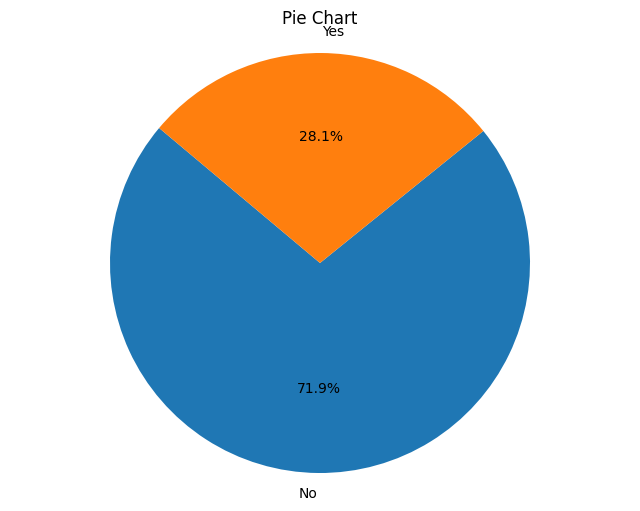

In [39]:
plot_pie_chart(df['Have you ever participated in a workforce or employment training program?_Response'].value_counts().reset_index(),
               label_column='Have you ever participated in a workforce or employment training program?_Response', 
             count_column='count')

In [40]:
data = df[df.index.isin(food_hosp_ids)]
data

NameError: name 'food_hosp_ids' is not defined

In [38]:
['Have you ever participated in a workforce or employment training program?_Response']

['Have you ever participated in a workforce or employment training program?_Response']

---

#### Barriers (Wilmington/NC vs Non-Wimington/NC)

In [467]:
df_zip_code = df[['Respondent ID','What zip code do you currently live in?_Open']]\
    .set_index('Respondent ID')\
    .rename({'What zip code do you currently live in?_Open':'zip_code'}, axis=1)
print('6 Responses missing zip codes')
display(df_zip_code.isna().sum())
df_zip_code.dropna(inplace=True)
df_zip_code['zip_code'] = df_zip_code['zip_code'].astype(int).astype(str)

print('Simplifying one zip (1980201101)')
index_extra_zip = df_zip_code[df_zip_code['zip_code'] == '1980201101'].index
df_zip_code.loc[index_extra_zip, 'zip_code'] = '19802'

n_unique_zips = df_zip_code['zip_code'].nunique()
print('\n')
print(f"{n_unique_zips} unique zipcodes")


6 Responses missing zip codes


zip_code    6
dtype: int64

Simplifying one zip (1980201101)


46 unique zipcodes


In [468]:
df_barrier_zip = df_barrier.merge(df_zip_code, how='left', left_on=['Respondent ID'], right_index=True)
barrier_q = 'What are some barriers that you feel you face to achieving your ideal job?'
barrier_cols_stripped = [col.lstrip(barrier_q + '_') for col in barrier_cols]
df_barrier_zip.columns = ['Respondent ID'] + barrier_cols_stripped + list(df_barrier_zip.columns[-2:])

In [469]:
barrier_types = barrier_cols_stripped[:-1]
barrier_types

['Lack of childcare',
 'Transportation challenges',
 'Criminal history',
 'Lack of trainings/skills set',
 'Social emotional skills']

In [475]:
print('Given MC Answer Categories')
df_barrier_zip_types = df_barrier_zip.groupby('zip_code')[barrier_types].sum()
display(df_barrier_zip_types.head(1), df_barrier_zip_types.shape)

print('Assigned "Other" Answer Categories')
df_barrier_zip_cats = df_barrier_zip.value_counts(['zip_code','category']).reset_index('category')
df_barrier_zip_cats = pd.pivot(data=df_barrier_zip_cats, columns='category', values='count').fillna(0)
df_barrier_zip_cats.columns = ['Other_' + col for col in df_barrier_zip_cats.columns]
display(df_barrier_zip_cats.head(1), df_barrier_zip_cats.shape)

print('Joining')

df_barrier_zip_joined = df_barrier_zip_types.join(df_barrier_zip_cats, how='left').fillna(0) # 14 zip codes didn't have any "answer" category

display(df_barrier_zip_joined.head(5))

Given MC Answer Categories


,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills
zip_code,,,,,
19072,0,0,0,1,0


(46, 5)

Assigned "Other" Answer Categories


,Other_Age,Other_Current Employment Situation,Other_Lack of Education,Other_Lack of Experience,Other_Lack of Opportunities,Other_Lack of Resources,Other_Lack of Time,Other_Lack of trainings/skills set,Other_Language/Migrant Status,Other_Location,Other_Misc.,Other_No Barriers,Other_Personal Barriers,Other_Social Barriers,Other_Social emotional skills,Other_Unsure
zip_code,,,,,,,,,,,,,,,,
19142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(32, 16)

Joining


,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,Other_Age,Other_Current Employment Situation,Other_Lack of Education,Other_Lack of Experience,Other_Lack of Opportunities,...,Other_Lack of Time,Other_Lack of trainings/skills set,Other_Language/Migrant Status,Other_Location,Other_Misc.,Other_No Barriers,Other_Personal Barriers,Other_Social Barriers,Other_Social emotional skills,Other_Unsure
zip_code,,,,,,,,,,,,,,,,,,,,,
19072,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19120,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19142,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19701,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19702,0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [521]:
# Add geometries and plot 
from urllib.request import urlopen
import json

url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/de_delaware_zip_codes_geo.min.json'

with urlopen(url) as response:
    zipcodes = json.load(response)

print(json.dumps(zipcodes, indent=4)[:400])
# zctas(19072)

{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "STATEFP10": "10",
                "ZCTA5CE10": "19962",
                "GEOID10": "1019962",
                "CLASSFP10": "B5",
                "MTFCC10": "G6350",
                "FUNCSTAT10": "S",
                "ALAND10": 37591415,
                "AWATER1


In [482]:
with open('de_zipcodes.json', 'w') as file:
    json.dump(zipcodes,file)

In [484]:
import geopandas as gpd

gdf = gpd.read_file('de_zipcodes.json')
gdf = gdf[['ZCTA5CE10', 'geometry']].set_index('ZCTA5CE10')
gdf

,geometry
ZCTA5CE10,
19962,"POLYGON ((-75.53140 39.05378, -75.53236 39.053..."
19936,"POLYGON ((-75.58837 39.22189, -75.58813 39.222..."
19720,"POLYGON ((-75.62946 39.68496, -75.62930 39.685..."
19806,"POLYGON ((-75.55876 39.74726, -75.55898 39.747..."
19804,"POLYGON ((-75.57044 39.72937, -75.56955 39.730..."
...,...
19733,"POLYGON ((-75.65278 39.55704, -75.65281 39.557..."
19945,"MULTIPOLYGON (((-75.08347 38.52856, -75.08367 ..."
19971,"POLYGON ((-75.13496 38.69166, -75.13525 38.692..."


<Axes: >

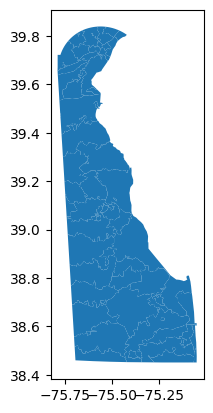

In [503]:
gdf.plot()

In [516]:
gdf_barrier_zip_joined_geoms = gpd.GeoDataFrame(df_barrier_zip_joined.join(gdf, how='right')).fillna(0)
display(gdf_barrier_zip_joined_geoms.head(), gdf_barrier_zip_joined_geoms.shape)

,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,Other_Age,Other_Current Employment Situation,Other_Lack of Education,Other_Lack of Experience,Other_Lack of Opportunities,...,Other_Lack of trainings/skills set,Other_Language/Migrant Status,Other_Location,Other_Misc.,Other_No Barriers,Other_Personal Barriers,Other_Social Barriers,Other_Social emotional skills,Other_Unsure,geometry
ZCTA5CE10,,,,,,,,,,,,,,,,,,,,,
19962,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.53140 39.05378, -75.53236 39.053..."
19936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.58837 39.22189, -75.58813 39.222..."
19720,2.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,"POLYGON ((-75.62946 39.68496, -75.62930 39.685..."
19806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.55876 39.74726, -75.55898 39.747..."
19804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.57044 39.72937, -75.56955 39.730..."


(68, 22)

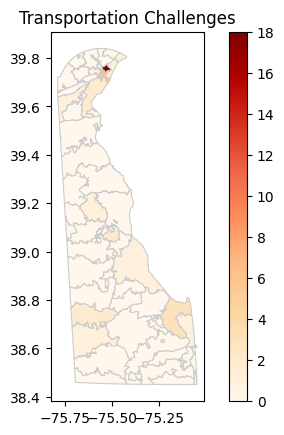

In [518]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_barrier_zip_joined_geoms.plot(column='Transportation challenges', ax=ax, legend=True, cmap='OrRd', linewidth=0.8, edgecolor='0.8')
ax.set_title('Transportation Challenges')
plt.show()


In [41]:
## Split by Wilmington/NC vs Non-Wilmington/NC
import pygris 

de_counties = pygris.counties(state='DE')

Using the default year of 2021
Using FIPS code '10' for input 'DE'


<Axes: >

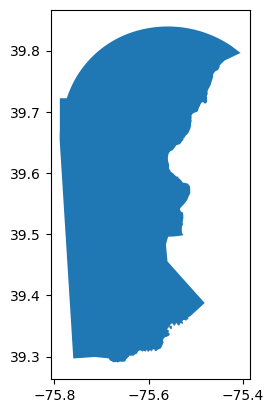

In [47]:
# de_counties[de_counties['NAME'] == 'New Castle'].plot()